In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import warnings
def ignore_warn(*args, **kwagrs):
    pass
warnings.warn = ignore_warn

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
# import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
data = pd.read_csv('../input/bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
count_list = ['age', 'job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [9]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30366,40,blue-collar,married,secondary,no,632,no,no,cellular,5,feb,611,2,-1,0,unknown,no
32641,35,services,married,secondary,no,195,yes,no,cellular,17,apr,203,1,-1,0,unknown,no
22019,44,management,married,tertiary,no,0,yes,no,cellular,20,aug,141,3,-1,0,unknown,no
34291,35,management,married,tertiary,no,520,yes,no,cellular,4,may,458,3,17,5,failure,yes
14403,39,entrepreneur,married,tertiary,no,0,yes,no,cellular,14,jul,111,2,-1,0,unknown,no
35940,31,services,married,secondary,no,0,yes,no,cellular,8,may,274,2,-1,0,unknown,no
32007,30,blue-collar,married,primary,no,-93,yes,no,cellular,13,apr,173,4,-1,0,unknown,no
38677,34,management,single,tertiary,no,1012,yes,yes,cellular,15,may,109,3,-1,0,unknown,no
4785,36,services,married,secondary,no,393,yes,yes,unknown,21,may,126,1,-1,0,unknown,no
12041,36,technician,single,secondary,no,129,yes,no,unknown,20,jun,200,7,-1,0,unknown,no


In [10]:
age = data[data['y'] == 'yes']['age']
age_plot = [go.Histogram(x=age)]
iplot(age_plot, filename='histogram')

In [11]:
no = data[data['y'] == 'no']['age']
age_no = [go.Histogram(x=no)]
iplot(age_no, filename='No')

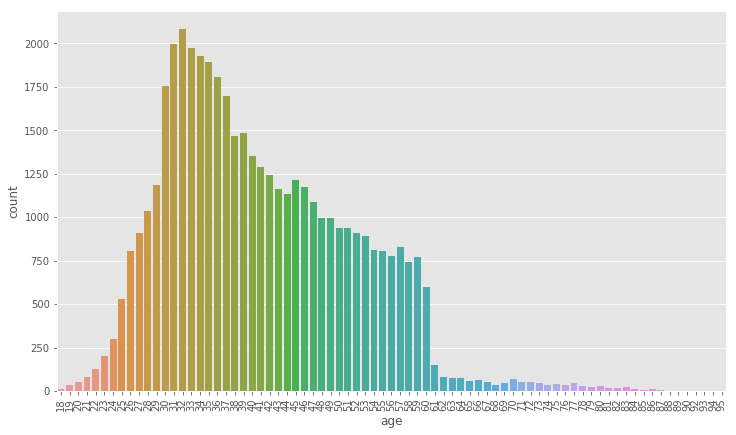

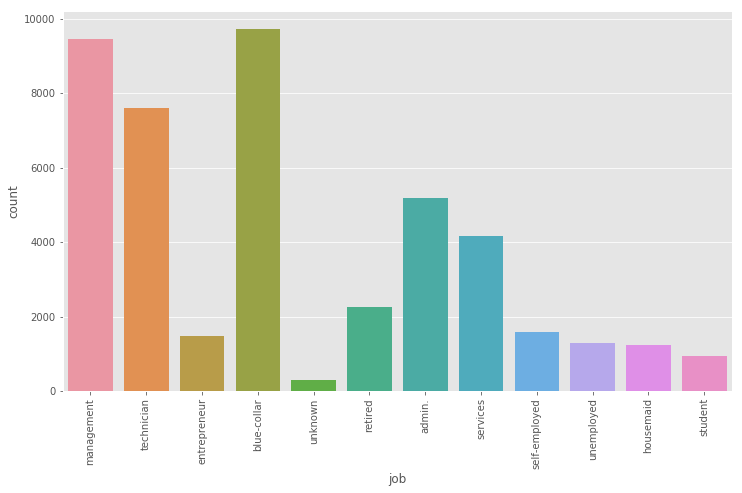

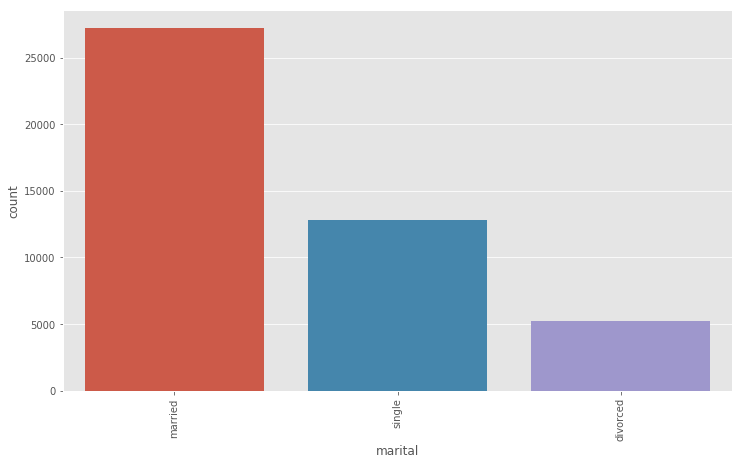

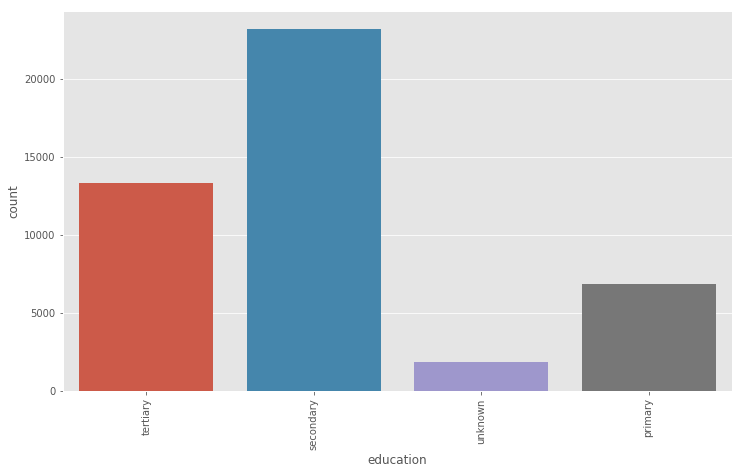

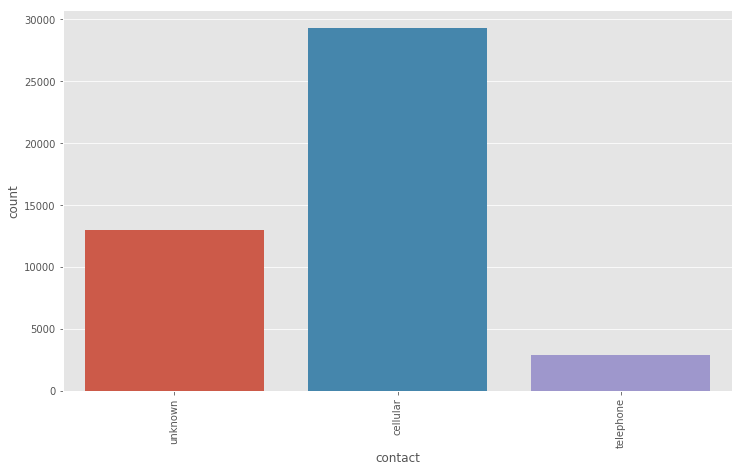

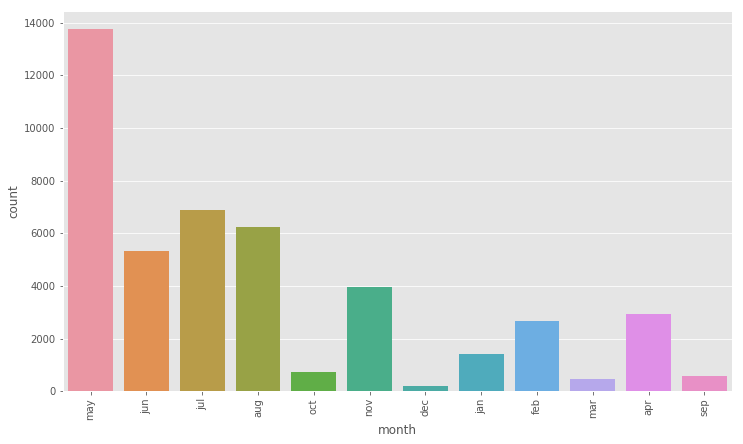

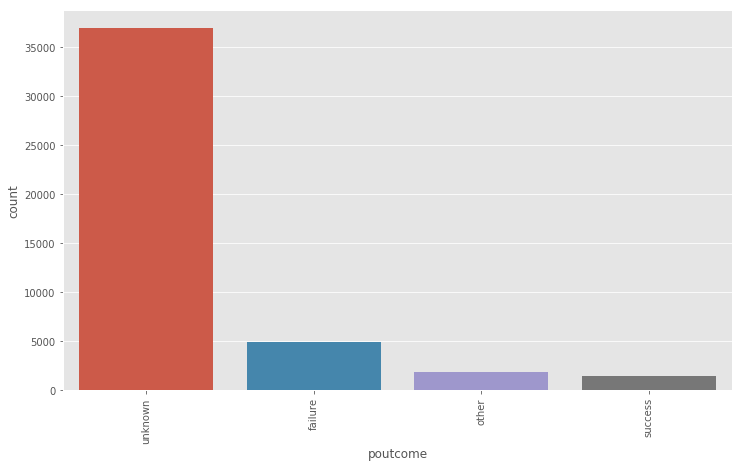

In [12]:
for feature in count_list:
    plt.figure(figsize=(12, 7))
    sns.countplot(feature, data=data)
    plt.xticks(rotation=90)
    plt.show()

In [13]:
data.rename(columns={'y': 'client'}, inplace=True)

In [14]:
data['client'] = data['client'].map({'no': 0, 'yes': 1})

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,client
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


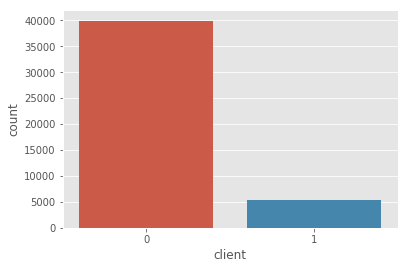

In [16]:
sns.countplot('client', data=data)
plt.show()

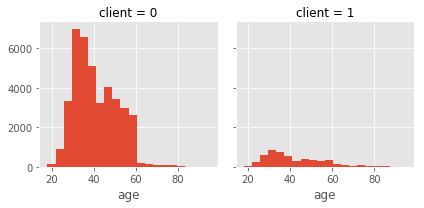

In [17]:
age = sns.FacetGrid(data, col='client')
age.map(plt.hist, 'age', bins=20)
plt.show()

In [18]:
job = data[['job', 'client']].groupby(['job'], as_index=False).mean().sort_values(ascending=False, by='client')
job

,job,client
8,student,0.286780
5,retired,0.227915
10,unemployed,0.155027
4,management,0.137556
0,admin.,0.122027
6,self-employed,0.118429
11,unknown,0.118056
9,technician,0.110570
7,services,0.088830
3,housemaid,0.087903


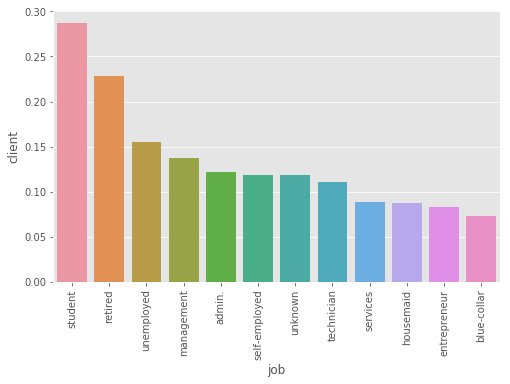

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='job', y='client', data=job)
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

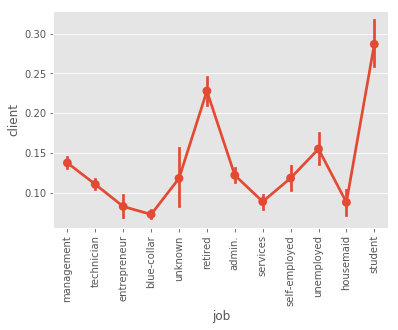

In [20]:
g = sns.pointplot(x='job', y='client', data=data)
plt.xticks(rotation=90)

In [21]:
data[['education', 'client']].groupby(['education'], as_index=False).mean().sort_values(by='client', ascending=False)

,education,client
2,tertiary,0.150064
3,unknown,0.135703
1,secondary,0.105594
0,primary,0.086265


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



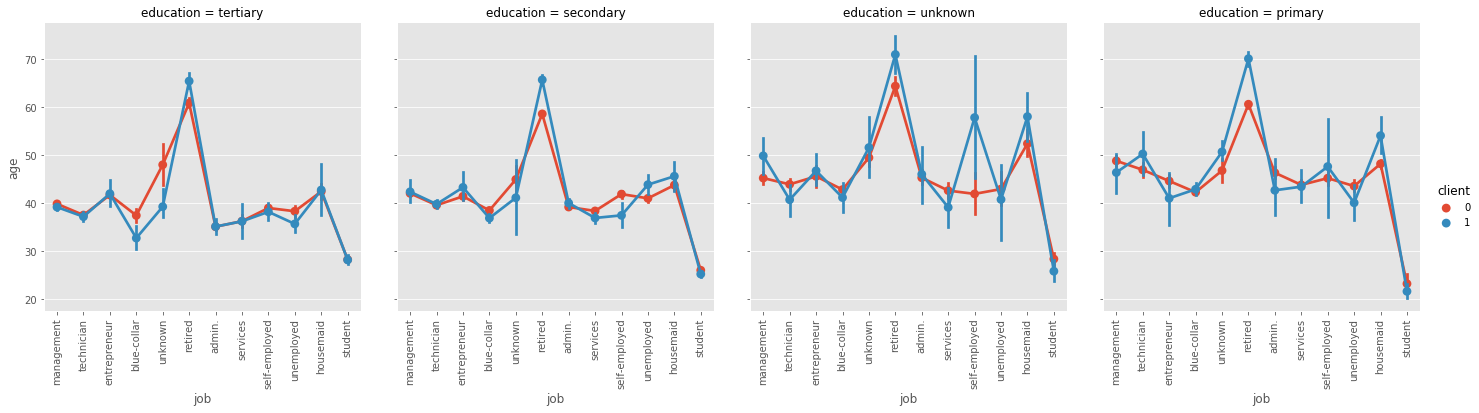

In [22]:
g = sns.catplot(x='job', y='age', col='education', hue='client', kind='point', data=data)
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=90)
plt.show()

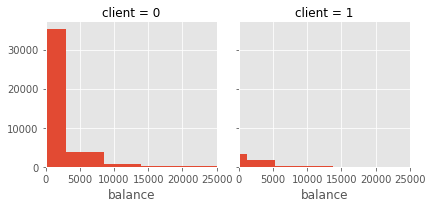

In [23]:
g = sns.FacetGrid(col='client', data=data)
g.map(plt.hist, 'balance', bins=20)
g.set(xlim=(0, 25000))

In [24]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,client
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [25]:
data[['client', 'default']].groupby(['default'], as_index=False).mean()

,default,client
0,no,0.117961
1,yes,0.063804


In [26]:
data[['client', 'housing']].groupby(['housing'], as_index=False).mean()

,housing,client
0,no,0.167024
1,yes,0.077000


In [27]:
data[['client', 'loan']].groupby(['loan'], as_index=False).mean()

,loan,client
0,no,0.126557
1,yes,0.066814


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



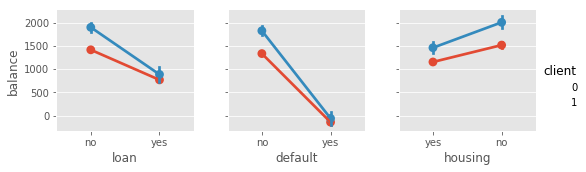

In [28]:
g = sns.PairGrid(data, x_vars=['loan', 'default', 'housing'], y_vars='balance', hue='client')
g.map(sns.pointplot)
g.add_legend()

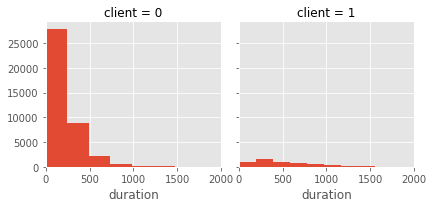

In [29]:
g = sns.FacetGrid(col='client', data=data)
g.map(plt.hist, 'duration', bins=20)
g.set(xlim=(0, 2000))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



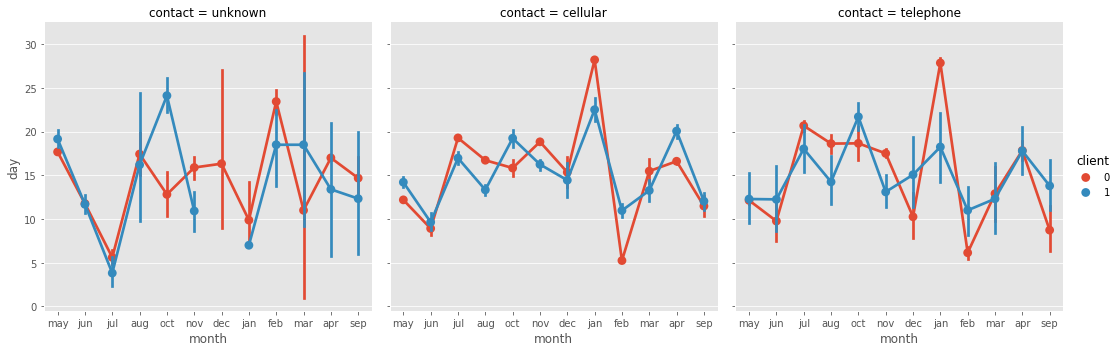

In [30]:
sns.factorplot(x='month', y='day', hue='client', col='contact', data=data)

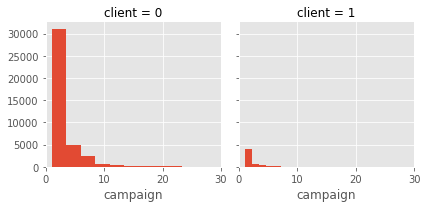

In [31]:
g = sns.FacetGrid(data, col='client')
g.map(plt.hist, 'campaign', bins=25)
g.set(xlim=(0, 30))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



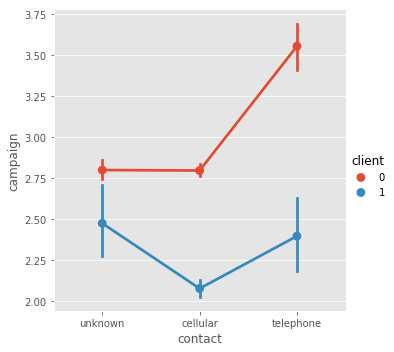

In [32]:
sns.factorplot(x='contact', y='campaign', hue='client', data=data)

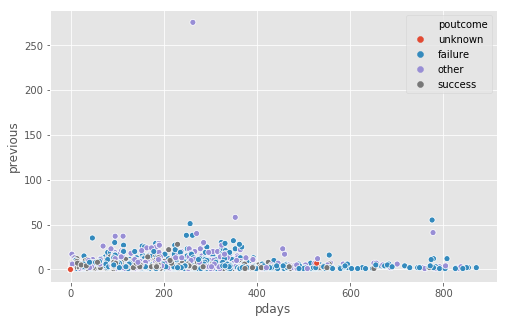

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='pdays', y='previous', hue='poutcome', data=data)
plt.show()

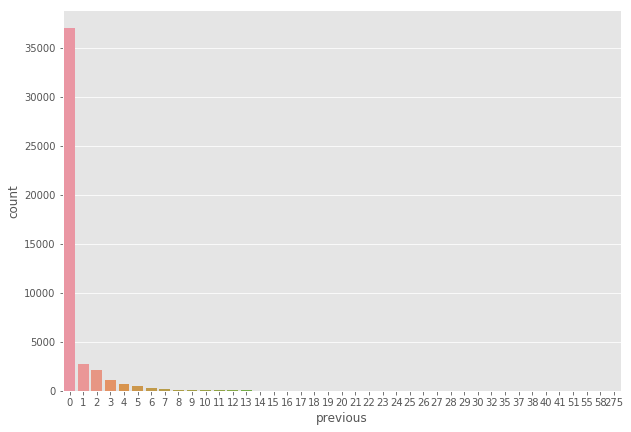

In [34]:
plt.figure(figsize=(10, 7))
sns.countplot('previous', data=data)

In [35]:
data.loc[data['previous'] > 250, 'previous'] = np.nan
data['previous'] = data['previous'].fillna(data['previous'].mode()[0])

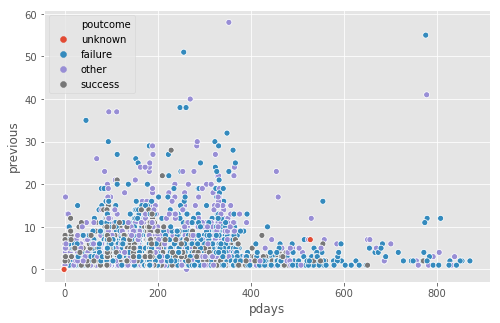

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='pdays', y='previous', hue='poutcome', data=data)
plt.show()

In [37]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,client
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.574241,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,1.907908,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,58.000000,1.000000


In [38]:
data['age_band'] = pd.cut(data['age'], 10)
data[['age_band', 'client']].groupby(['age_band'], as_index=False).mean().sort_values(by='age_band', ascending=False)

,age_band,client
9,"(87.3, 95.0]",0.500000
8,"(79.6, 87.3]",0.413793
7,"(71.9, 79.6]",0.455446
6,"(64.2, 71.9]",0.392573
5,"(56.5, 64.2]",0.150060
4,"(48.8, 56.5]",0.091707
3,"(41.1, 48.8]",0.090580
2,"(33.4, 41.1]",0.100193
1,"(25.7, 33.4]",0.124457
0,"(17.923, 25.7]",0.239521


In [39]:
data.loc[data['age'] < 25.7, 'age'] = 0
data.loc[(data['age'] > 25.7) & (data['age'] < 33.4), 'age'] = 1
data.loc[(data['age'] > 33.4) & (data['age'] < 41.1), 'age'] = 2
data.loc[(data['age'] > 41.1) & (data['age'] < 48.8), 'age'] = 3
data.loc[(data['age'] > 48.8) & (data['age'] < 56.5), 'age'] = 4
data.loc[(data['age'] > 56.5) & (data['age'] < 64.2), 'age'] = 5
data.loc[(data['age'] > 64.2) & (data['age'] < 71.9), 'age'] = 6
data.loc[(data['age'] > 71.9) & (data['age'] < 79.6), 'age'] = 7
data.loc[(data['age'] > 79.6) & (data['age'] < 87.3), 'age'] = 8
data.loc[data['age'] > 87.3, 'age'] = 9

In [40]:
data['balance_band'] = pd.cut(data['balance'], 10)
data[['balance_band', 'client']].groupby(['balance_band'], as_index=False).mean().sort_values(by='balance_band', ascending=False)

,balance_band,client
9,"(91112.4, 102127.0]",0.000000
8,"(80097.8, 91112.4]",1.000000
7,"(69083.2, 80097.8]",0.000000
6,"(58068.6, 69083.2]",0.000000
5,"(47054.0, 58068.6]",0.285714
4,"(36039.4, 47054.0]",0.095238
3,"(25024.8, 36039.4]",0.189655
2,"(14010.2, 25024.8]",0.115646
1,"(2995.6, 14010.2]",0.166062
0,"(-8129.146, 2995.6]",0.110365


In [41]:
data.loc[data['balance'] < 2995.6, 'balance'] = 0
data.loc[(data['balance'] > 2995.6) & (data['balance'] < 14010.2), 'balance'] = 1
data.loc[(data['balance'] > 14010.2) & (data['balance'] < 25024.8), 'balance'] = 2
data.loc[(data['balance'] > 25024.8) & (data['balance'] < 36039.4), 'balance'] = 3
data.loc[(data['balance'] > 36039.4) & (data['balance'] < 47054), 'balance'] = 4
data.loc[(data['balance'] > 47054) & (data['balance'] < 58068.6), 'balance'] = 5
data.loc[(data['balance'] > 58068.6) & (data['balance'] < 69083.2), 'balance'] = 6
data.loc[(data['balance'] > 69083.2) & (data['balance'] < 80097.8), 'balance'] = 7
data.loc[(data['balance'] > 80097.8) & (data['balance'] < 91112.4), 'balance'] = 8
data.loc[data['balance'] > 91112.4, 'balance'] = 9

In [42]:
data['day_band'] = pd.cut(data['day'], 5)
data[['day_band', 'client']].groupby(['day_band'], as_index=False).mean().sort_values('day_band', ascending=False)

,day_band,client
4,"(25.0, 31.0]",0.107683
3,"(19.0, 25.0]",0.109748
2,"(13.0, 19.0]",0.106290
1,"(7.0, 13.0]",0.135792
0,"(0.97, 7.0]",0.125842


In [43]:
data.loc[data['day'] <= 7, 'day'] = 0
data.loc[(data['day'] > 7) & (data['day'] <= 13), 'day'] = 1
data.loc[(data['day'] > 13) & (data['day'] <= 19), 'day'] = 2
data.loc[(data['day'] > 19) & (data['day'] <= 25), 'day'] = 3
data.loc[data['day'] > 25, 'day'] = 4

In [44]:
data['duration_band'] = pd.cut(data['duration'], 5)
data[['duration_band', 'client']].groupby(['duration_band'], as_index=False).mean().sort_values('duration_band', ascending=False)

,duration_band,client
4,"(3934.4, 4918.0]",0.000000
3,"(2950.8, 3934.4]",0.461538
2,"(1967.2, 2950.8]",0.555556
1,"(983.6, 1967.2]",0.604227
0,"(-4.918, 983.6]",0.104848


In [45]:
data.loc[data['duration'] < 983.6, 'duration'] = 0
data.loc[(data['duration'] > 983.6) & (data['duration'] < 1967.2), 'duration'] = 1
data.loc[(data['duration'] > 1967.2) & (data['duration'] < 2950.8), 'duration'] = 2
data.loc[(data['duration'] > 2950.8) & (data['duration'] < 3934.4), 'duration'] = 3
data.loc[data['duration'] > 3934.4, 'duration'] = 4

In [46]:
data['campaign_band'] = pd.cut(data['campaign'], 6)
data[['campaign_band', 'client']].groupby(['campaign_band'], as_index=False).mean().sort_values('campaign_band', ascending=False)

,campaign_band,client
5,"(52.667, 63.0]",0.000000
4,"(42.333, 52.667]",0.000000
3,"(32.0, 42.333]",0.000000
2,"(21.667, 32.0]",0.017544
1,"(11.333, 21.667]",0.035623
0,"(0.938, 11.333]",0.118916


In [47]:
data.loc[data['campaign'] < 11.3, 'campaign'] = 0
data.loc[(data['campaign'] > 11.3) & (data['campaign'] < 21.6), 'campaign'] = 1
data.loc[(data['campaign'] > 21.6) & (data['campaign'] <= 32), 'campaign'] = 2
data.loc[(data['campaign'] > 32) & (data['campaign'] < 42.3), 'campaign'] = 3
data.loc[(data['campaign'] > 42.3) & (data['campaign'] < 52.6), 'campaign'] = 4
data.loc[data['campaign'] > 52.6, 'campaign'] = 5

In [48]:
data['pdays_band'] = pd.cut(data['pdays'], 9)
data[['pdays_band', 'client']].groupby(['pdays_band'], as_index=False).mean().sort_values('pdays_band', ascending=False)

,pdays_band,client
8,"(774.111, 871.0]",0.428571
7,"(677.222, 774.111]",0.333333
6,"(580.333, 677.222]",0.350000
5,"(483.444, 580.333]",0.416667
4,"(386.556, 483.444]",0.574194
3,"(289.667, 386.556]",0.100762
2,"(192.778, 289.667]",0.144634
1,"(95.889, 192.778]",0.272224
0,"(-1.872, 95.889]",0.102395


In [49]:
data.loc[data['pdays'] == -1, 'pdays'] = 0
data.loc[(data['pdays'] > 0) & (data['pdays'] < 95.8), 'pdays'] = 1
data.loc[(data['pdays'] > 95.8) & (data['pdays'] < 95.8), 'pdays'] = 2
data.loc[(data['pdays'] > 192.7) & (data['pdays'] < 289.6), 'pdays'] = 3
data.loc[(data['pdays'] > 289.6) & (data['pdays'] < 386.5), 'pdays'] = 4
data.loc[(data['pdays'] > 386.5) & (data['pdays'] < 483.4), 'pdays'] = 5
data.loc[(data['pdays'] > 483.4) & (data['pdays'] < 580.3), 'pdays'] = 6
data.loc[(data['pdays'] > 580.3) & (data['pdays'] < 677.2), 'pdays'] = 7
data.loc[(data['pdays'] > 677.2) & (data['pdays'] < 774.1), 'pdays'] = 8
data.loc[data['pdays'] > 774.1, 'pdays'] = 9

In [50]:
data['previous_band'] = pd.cut(data['previous'], 6)
data[['previous_band', 'client']].groupby(['previous_band'], as_index=False).mean().sort_values('previous_band', ascending=False)

,previous_band,client
5,"(48.333, 58.0]",0.666667
4,"(38.667, 48.333]",0.000000
3,"(29.0, 38.667]",0.111111
2,"(19.333, 29.0]",0.125000
1,"(9.667, 19.333]",0.238255
0,"(-0.058, 9.667]",0.116140


In [51]:
data.loc[data['previous'] < 9.6, 'previous'] = 0
data.loc[(data['previous'] > 9.6) & (data['previous'] < 19.3), 'previous'] = 1
data.loc[(data['previous'] > 19.3) & (data['previous'] <= 29), 'previous'] = 2
data.loc[(data['previous'] > 29) & (data['previous'] < 38.6), 'previous'] = 3
data.loc[(data['previous'] > 38.6) & (data['previous'] < 48.3), 'previous'] = 4
data.loc[data['previous'] > 48.3, 'previous'] = 5

In [52]:
data.drop(['age_band', 'balance_band', 'day_band', 'duration_band', 'campaign_band', 'pdays_band', 'previous_band'], axis=1, inplace=True)

In [53]:
data['previous'] = data['previous'].astype(int)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,client
0,5,management,married,tertiary,no,0,yes,no,unknown,0,may,0,0,0,0,unknown,0
1,3,technician,single,secondary,no,0,yes,no,unknown,0,may,0,0,0,0,unknown,0
2,1,entrepreneur,married,secondary,no,0,yes,yes,unknown,0,may,0,0,0,0,unknown,0
3,3,blue-collar,married,unknown,no,0,yes,no,unknown,0,may,0,0,0,0,unknown,0
4,1,unknown,single,unknown,no,0,no,no,unknown,0,may,0,0,0,0,unknown,0


In [54]:
cols = data.dtypes[data.dtypes == 'O'].index
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

## Encoder some object features

In [55]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in cols:
    data[col] = label.fit(data[col]).transform(data[col])

## Modeling

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
# from sklearn.grid_search import GridSearchCV
# from sklearn.cross_validation import cross_val_score
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
import xgboost as xgb

In [ ]:
target = 'client'

In [ ]:
train = data.drop(['client'], axis=1)
test = data['client']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=.3)

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
score = 100*accuracy_score(y_test, y_pred)
score

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
score = 100*accuracy_score(y_test, y_pred)
score

In [ ]:
model_xgb = xgb.XGBClassifier(
    learning_rate = 0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=10)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
score = 100*accuracy_score(y_test, y_pred)
score

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = 100*accuracy_score(y_test, y_pred)
score

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
model = KneighborsClassifier(n_neighbors=10)
param_test = {
    
}

In [ ]:
train.head()

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
score = 100*accuracy_score(y_test, y_pred)
score

In [ ]:
gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)
score = 100*accuracy_score(y_test, y_pred)
score

In [ ]:
def modelfit(model, train, predictors, useTrainCV=True, cv_folds = 5, early_stopping_rounds=100):
    if useTrainCV:
        model_params = model.get_xgb_params()
        xgbtrain = xgb.DMatrix(train[predictors].values, label=train[target].values)
        cvresult = xgb.cv(model_params, xgbtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds, metrics='auc', verbose_eval=False)
        model.set_params(n_estimators=cvresult.shape[0])
    # fit model
    model.fit(train[predictors], train[target], eval_metric='auc')
    # predict
    predictions = model.predict(train[predictors])
    probs = model.predict_proba(train[predictors])[:, 1]
    # print report model
    print('Model report:')
    print('Accuracy: {}'.format(metrics.accuracy_score(train[target].values, predictions)))
    print('AUC score: {}'.format(metrics.roc_auc_score(train[target], probs)))
    # plot feature importance
    index = train.drop([target], axis=1).columns
    feature_imp = pd.Series(data=model.feature_importances_,
                            index = index).sort_values(ascending=False)
    plt.figure(figsize=(16, 9))
    feature_imp.plot(kind='bar', color='blue', title='Feature importances')
    plt.ylabel('Score')
    plt.xlabel('Feature importance')
    

In [ ]:
# predictors = [x for x in data.columns if x not in [target]]
# model = XGBClassifier(
#     learning_rate = 0.1,
#     n_estimators=1000,
#     max_depth=5,
#     min_child_weight=1,
#     gamma=0,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     objective='binary:logistic',
#     nthread=4,
#     scale_pos_weight=1,
#     seed=10)
# modelfit(model, data, predictors)

In [ ]:
# params_test = {
#     'max_depth': [3, 4, 5, 6, 7, 8, 9],
#     'min_child_weight': [1, 2, 3, 4, 5, 6]
# }
# gsearch = GridSearchCV(estimator = XGBClassifier(
#     learning_rate = 0.1,
#     n_estimators=200,
#     max_depth=5,
#     min_child_weight=1,
#     gamma=0,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     objective='binary:logistic',
#     nthread=4,
#     scale_pos_weight=1,
#     seed=10), param_grid = params_test, scoring = 'roc_auc', n_jobs=4, iid=False, cv=5)
# gsearch.fit(data[predictors], data[target])
# gsearch.best_estimator_, gsearch.best_params_, gsearch.best_score_

In [ ]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
score = 100*accuracy_score(y_test, y_pred)
score

In [ ]:
# params_test = {
#     'max_depth': [3, 4, 5, 6, 7, 8, 9],
#     'n_estimators': [50, 100, 150, 200, 250]
# }
# model = XGBClassifier()
# #kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# gsearch = GridSearchCV(model, params_test, scoring='roc_auc', n_jobs=-1, cv=5, verbose=1)
# result = gsearch.fit(data[predictors], data[target])
# result.best_score_, result.best_params_